In [1]:
import numpy as np
import time
import cv2
import os
import matplotlib
matplotlib.rcParams['figure.figsize']= (5.0,5.0)
import matplotlib.pyplot as plt
%matplotlib inline 

<div class="alert alert-block alert-info">
<b>Image and data path:</b> We will load all possible configuration and weights path. We will also load the image of Mr. Bean and his Teddy bear and see if YOLO is able to detect the objects in the image clearly. :) 
</div>

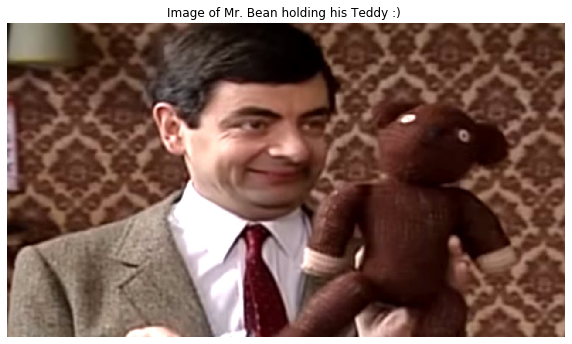

In [2]:
labels_path  = os.getcwd()+'\\yolo-coco\\coco.names'
weights_path = os.getcwd()+'\\yolo-coco\\yolov3.weights'
configs_path = os.getcwd()+'\\yolo-coco\\yolov3.cfg'
test_image   = os.getcwd()+'\\sample images\\bean and teddy.jpg'
image        = cv2.imread(test_image)
plt.figure(figsize=(10,10));
plt.imshow(image[:,:,::-1]);
plt.axis('off');
plt.title('Image of Mr. Bean holding his Teddy :) ');

In [3]:
labels       = open(labels_path).read().strip().split("\n")
colors       = np.random.randint(0, 255, size=(len(labels), 3),dtype="uint8")

In [4]:
print('The available labels are:- \n',labels)

The available labels are:- 
 ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
print('The height and width of image is captured for further image preprocessing steps')
(H, W) = image.shape[:2]
print('Height:-',H,' and Width:-',W)

The height and width of image is captured for further image preprocessing steps
Height:- 720  and Width:- 1280


<div class="alert alert-block alert-info">
<b><u>Reading from darknet:- </u></b> We will read a network model stored in darknet model files. <br>
    <b><u>Arguments involved  :- </u></b><br> <i><b>configs_path</b></i> = configuration file path(.cfg file) <br> <i><b>weights_path</b></i> = Path to weights file (.weights file) <br><br>
    The outcome will be a net object ready to be used forward
</div>

In [6]:
model          = cv2.dnn.readNetFromDarknet(configs_path,weights_path)

<div class="alert alert-block alert-info">
    <b><u>Creating a blob:</b></u>
    <b>Blob:- </b>A blob is a group of connected pixels in the image that share a common property. <br>
    A Blob will be a 4 dimensional tensor with NCHW(sample size, channel, height,width) dimension order. It will be a preprocessed image that will be considered as an input to the model object created in the previous step. 
</div>

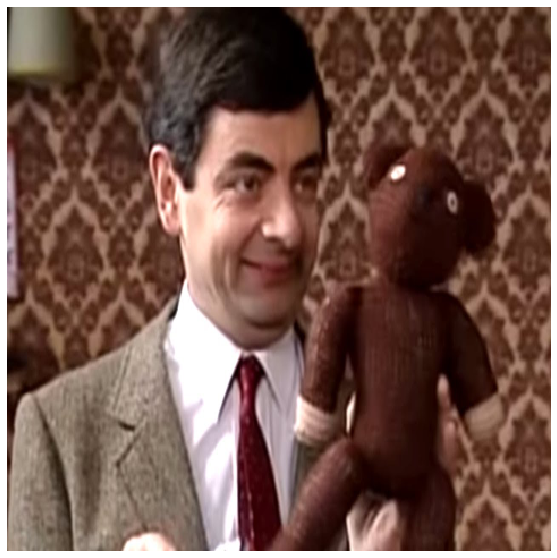

In [7]:
blob         = cv2.dnn.blobFromImage(image, 1 / 255.0, (480, 480),swapRB=True, crop=False)
bl_im        = np.transpose(blob, (0,2,3,1))
plt.figure(figsize=(10,10));
plt.imshow(bl_im[0]);
plt.axis('off');

In [8]:
print('the shape of blob is :- ',blob.shape)

the shape of blob is :-  (1, 3, 480, 480)


<div class="alert alert-block alert-info">
<b>Getting all layers of Yolo Model:</b> Here we get all the layers of the YOLO model used by Darknet (it is pretrained)
</div>

In [9]:
layers_yolo          = model.getLayerNames()
print('The layer names of a darknet YOLO model is given as \n',layers_yolo)

The layer names of a darknet YOLO model is given as 
 ['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 

<div class="alert alert-block alert-info">
<b>Extracting unconnected YOLO layers needed:</b> We will be extracting the unconnected YOLO layers that we will be adding to the model object initialised previously
</div>

In [10]:
yolo_layers_needed = [layers_yolo[i[0]-1] for i in model.getUnconnectedOutLayers()]

<div class="alert alert-block alert-info">
<b>Passing the Blob through the network:</b> We will pass the preprocessed image (blob) through the network and get the outputs stored in a variable
</div>

In [11]:
retval        = model.setInput(blob)
layer_outputs = model.forward(yolo_layers_needed)

In [12]:
print('The number of outputs :- ',len(layer_outputs))

The number of outputs :-  3


In [13]:
print('The shape of first detection is :- ',layer_outputs[0].shape)
print('The number of boxes detected is :- ',layer_outputs[0].shape[0])
print('The output vector containing box height, box width, centre and probabilities is of size :- ',layer_outputs[0].shape[1])

The shape of first detection is :-  (675, 85)
The number of boxes detected is :-  675
The output vector containing box height, box width, centre and probabilities is of size :-  85


<div class="alert alert-block alert-info">
<b>Attaining bounding boxes:</b> We can see that there are 675 bounding boxes in the first output itself. Each box will have the fifth element as box confidence which will be either 0 or 1 indicating the presence and absence of an object in the box. We will gather the feature of the boxes where the confidence is greater than 0.
</div>

In [14]:
boxes                = []
probabilities        = []
classIDs             = []
score_threshold      = 0.1
for output in layer_outputs:
    for detection in output:
        if detection[4]>0.0:                                                ### Detecting the presence of object 
            scores  = detection[5:]                                         ### Capturing the probabilities of corresponding class ID 
            classid =  np.argmax(scores)                                    ### Finding the class ID with maximum probability 
            prob = np.max(scores)                                           ### Finding maximum probability
            if prob > score_threshold:                                      ### Thresholding to filter yolo boxes (score threshold) 
                box = detection[0:4]*np.array([W,H,W,H])
                (centerX, centerY, width, height) = box.astype("int")
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                boxes.append([x, y, int(width), int(height)])
                probabilities.append(float(prob))
                classIDs.append(classid)


<div class="alert alert-block alert-info">
<b>Non Max suppression:</b> We will use Non max suppression to remove the overlapping bounding boxes. We define the Maximum suppression threshold here and use the score threshold define d previously.
</div>

In [15]:
idxs = cv2.dnn.NMSBoxes(boxes, probabilities, score_threshold= score_threshold,nms_threshold= 0.2)


<div class="alert alert-block alert-info">
<b>Obtaining Boxes to put in the image:</b> We will use bounding boxes along the objects detected with text in the image.
</div>

In [16]:
if len(idxs)>0:
    for i in idxs.flatten():
        (x,y) = (boxes[i][0],boxes[i][1])
        (w,h) = (boxes[i][2],boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(labels[classIDs[i]], 100*round(probabilities[i],4))
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 1)
        
        

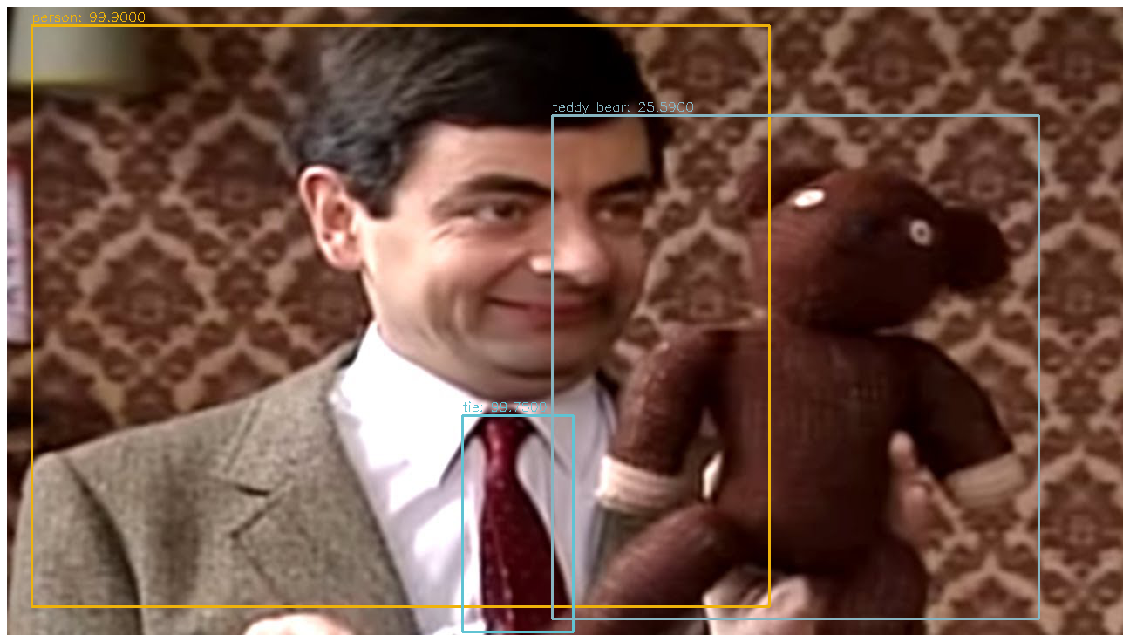

In [17]:
plt.figure(figsize=(20,20));
plt.imshow(image[:,:,::-1])
plt.axis('off');

<div class="alert alert-block alert-info">
<b>Notes and Conclusion:</b> We can clearly see that YOLO detected even the tie along with Mr Bean and his Teddy.
</div>

<div class="alert alert-block alert-info">
<b>Wrapper for automated YOLO :</b> This is a wrapper built around the above steps and can be used as a standalone library to be called to implement the YOLO whenever needed. Its implementation is shown in another separate notebook in the same project folder
</div>

In [18]:
# import numpy as np
# import time
# import cv2
# import os
# import matplotlib
# matplotlib.rcParams['figure.figsize']= (5.0,5.0)
# import matplotlib.pyplot as plt


# class Yolo_Implementation(object):
#     def __init__(self,labels_path,weights_path,config_path,test_image,score_threshold=0.1,nms_threshold=0.2):
#         self.score_threshold = score_threshold
#         self.nms_threshold   = nms_threshold
#         self.weights_path    = weights_path
#         self.config_path     = config_path
#         self.image           = cv2.imread(test_image)
#         (self.H, self.W)     = self.image.shape[:2]
#         self.labels          = open(labels_path).read().strip().split("\n")
#         self.colors          = np.random.randint(0, 255, size=(len(self.labels), 3),dtype="uint8")
      
#     def build_model(self):
#         model              = cv2.dnn.readNetFromDarknet(self.config_path,self.weights_path)
#         blob               = cv2.dnn.blobFromImage(self.image, 1 / 255.0, (480, 480),swapRB=True, crop=False)
#         layers_yolo        = model.getLayerNames()
#         yolo_layers_needed = [layers_yolo[i[0]-1] for i in model.getUnconnectedOutLayers()]
#         retval             = model.setInput(blob)
#         layer_outputs      = model.forward(yolo_layers_needed)
#         return layer_outputs
    
#     def yolo_filter_boxes(self):
#         boxes                = []
#         probabilities        = []
#         classIDs             = []
#         layer_outputs        = self.build_model()
#         for output in layer_outputs:
#             for detection in output:
#                 if detection[4]>0.0:                                                ### Detecting the presence of object 
#                     scores  = detection[5:]                                         ### Capturing the probabilities of corresponding class ID 
#                     classid =  np.argmax(scores)                                    ### Finding the class ID with maximum probability 
#                     prob = np.max(scores)                                           ### Finding maximum probability
#                     if prob > self.score_threshold:                                      ### Thresholding to filter yolo boxes (score threshold) 
#                         box = detection[0:4]*np.array([self.W,self.H,self.W,self.H])
#                         (centerX, centerY, width, height) = box.astype("int")
#                         x = int(centerX - (width / 2))
#                         y = int(centerY - (height / 2))
#                         boxes.append([x, y, int(width), int(height)])
#                         probabilities.append(float(prob))
#                         classIDs.append(classid)
#         return boxes,probabilities,classIDs
    
#     def yolo_non_max_suppress(self):
#         boxes,probabilities,classIDs = self.yolo_filter_boxes()
#         idxs = cv2.dnn.NMSBoxes(boxes, probabilities,self.score_threshold,self.nms_threshold)
#         if len(idxs)>0:
#             for i in idxs.flatten():
#                 (x,y) = (boxes[i][0],boxes[i][1])
#                 (w,h) = (boxes[i][2],boxes[i][3])
#                 color = [int(c) for c in self.colors[classIDs[i]]]
#                 cv2.rectangle(self.image, (x, y), (x + w, y + h), color, 2)
#                 text = "{}: {:.4f}".format(self.labels[classIDs[i]], 100*round(probabilities[i],4))
#                 cv2.putText(self.image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 1)
#         plt.figure(figsize=(20,20));
#         plt.imshow(self.image[:,:,::-1])
#         plt.axis('off');


        

